# Sentiment Analysis of Product reviews

Name : Raguath Gunasekaran

## Introduction

Sentiment analysis, which is also known as opinion mining, studies people’s sentiments towards certain entities. [Ref 1]

In recent days, Sentiment analysis has gain much attention  Sentiment analysis or opinion mining is one of the major tasks of NLP (Natural Language Processing) and Machine Learning. 
It's used to determine whether the given product review is positive, negative or neutral. Sentiment analysis is often performed on textual data to help businesses monitor brand and product sentiment in customer feedback, and understand customer need [ Ref 3 ]

Business Success, The Product Owner should understand the customers mindset and their opinion. Sentiment analysis is extremely important to understand the customer mindset because it helps businesses quickly understand the overall opinions of their customers. 
By automatically sorting the sentiment behind reviews, social media conversations. once we understand the sentiment, Product owner can react to solve the issue or enhance the features of the product to attract the customer. [ Ref 3 ]

Python as a programming language has numerous uses such as Machine Learning, AI, mobile applications, statistical , etc. As we know, AI, machine learning, and data analysis/analytics is where it has amassed most of its popularity. 
Python contains more libraries and packages is continually being employed which helped to solve complex industry issues, data-driven strategies, risk analysis etc.

## Business Understanding: Defining the Problem

The business objective remained the same: The main goal of the project is to build a sentiment analysis predictive model to predict or determine to determined whether the product is satisying the customer or not. 
I am going to use different classification machine learning algorithms to get more accurate predictions through NLP.

Defining the Target Variable : The Target variable is going to be target class. The Review prediction is going to be Positive, Negative or Netural and Review Text and Recommended IND  variable as a predictor

## Data Understanding

Data used in this project are online product reviews collected from Kaggle.com ( Women’s Clothing E-Commerce dataset )
https://www.kaggle.com/nicapotato/womens-ecommerce-clothing-reviews

The format of the dataset for this case study is CSV. The data contains below variables.
Pandas library used to load the data from csv to Dataframe.

Clothing ID: The specific Clothing being reviewed.

Age: Age of the Reviewer.

Title: Review Title.

Review Text: detail content of the Product Review.

Rating: Score from 1 Worst, to 5 Best.

Recommended IND: Customer recommends the product or not

Positive Feedback Count: Number of other customers who found this review positive.

Division Name: Product high level division.

Department Name: Product department name.

Class Name: Product class name.


#### Tools and Library to be used in this Project

Python

Pandas library

scikit-learn library

Matplot Library

nltk Library

Jupyter Notebook as an IDE.


## Data Preparation
Based on the reading, “data scientists usually spend 70% of the project time here, preprocessing and exploring the data”. So, the Data Preparation is important for predictive analytics project. In this project, we need to make sure the data is suitable and well prepared for model. While preparing the Data, we need to verify the metadata of the given dataset and need to understand very clearly about data patterns, relationships etc

As part of suggestion from Professor, I am adding more detail on this.

Review Text is going to be predictor variable and Review Text is the text collected from customers. 

Recommended will be used as target variable and Recommended is collected from customer which defines the product 1 is recommended, 0 is not recommended

Based on the Rating, Review and Recommended, I am going to create one Sentiment Classifier which provides good or bad Review.

As part of Text Processing, I am planning to use ‘CountVectorizer’ from the scikit-learn and CountVectorizer develops a vector of all the words in the Review Text. Then apply  Logistic Regression ( binary classification ), SVM, Random Forest, Naive Bayes and other Algorithms to find the high accurate model.

Also based on the Reivew text, we find the most common used words for positive and most common words for Negative.

### Importing packages and loading data

In [5]:
pip install yellowbrick

     |████████████████████████████████| 271 kB 4.2 MB/s eta 0:00:01
     |████████████████████████████████| 14.8 MB 57.5 MB/s eta 0:00:01
  Attempting uninstall: numpy
    Found existing installation: numpy 1.20.2
    Uninstalling numpy-1.20.2:
      Successfully uninstalled numpy-1.20.2
Note: you may need to restart the kernel to use updated packages.


In [6]:
# data processing
import pandas as pd

# linear algebra
import numpy as np

# data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Word Processing
import re
import string
from wordcloud import WordCloud

#nltk for Text preprocessing 
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer

# Machine Learning Models
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

import yellowbrick
from yellowbrick.features import Rank2D

from sklearn.linear_model import LogisticRegression
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import ROCAUC

/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/feature_extraction/image.py:167: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int):
/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guida

In [7]:
ProductReview_df = pd.read_csv('Womens Clothing E-Commerce Reviews.csv', header=0,index_col=0)
ProductReview_df.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


####  Metadata of the Dataframe

In [8]:
ProductReview_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23486 entries, 0 to 23485
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Clothing ID              23486 non-null  int64 
 1   Age                      23486 non-null  int64 
 2   Title                    19676 non-null  object
 3   Review Text              22641 non-null  object
 4   Rating                   23486 non-null  int64 
 5   Recommended IND          23486 non-null  int64 
 6   Positive Feedback Count  23486 non-null  int64 
 7   Division Name            23472 non-null  object
 8   Department Name          23472 non-null  object
 9   Class Name               23472 non-null  object
dtypes: int64(5), object(5)
memory usage: 2.0+ MB


In [9]:
# Step 2:  check the dimension of the table
print("The dimension of the table is: ")
ProductReview_df.shape

The dimension of the table is: 


(23486, 10)

## EDA - Exploratory data analysis

#### Summarized Data

In [10]:
print("Describe Data")
print(ProductReview_df.describe())
print("Summarized Data")
print(ProductReview_df.describe(include=['O']))

Describe Data
        Clothing ID           Age        Rating  Recommended IND  \
count  23486.000000  23486.000000  23486.000000     23486.000000   
mean     918.118709     43.198544      4.196032         0.822362   
std      203.298980     12.279544      1.110031         0.382216   
min        0.000000     18.000000      1.000000         0.000000   
25%      861.000000     34.000000      4.000000         1.000000   
50%      936.000000     41.000000      5.000000         1.000000   
75%     1078.000000     52.000000      5.000000         1.000000   
max     1205.000000     99.000000      5.000000         1.000000   

       Positive Feedback Count  
count             23486.000000  
mean                  2.535936  
std                   5.702202  
min                   0.000000  
25%                   0.000000  
50%                   1.000000  
75%                   3.000000  
max                 122.000000  
Summarized Data
           Title                                        Revi

####  Checking Nulls and Renaming the column names

In [11]:
ProductReview_df.isnull().sum()

Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

In [12]:
ProductReview_df = ProductReview_df.rename(columns={"Recommended IND": "Recommended", "Review Text": "Review"})
ProductReview_df.head()

,Clothing ID,Age,Title,Review,Rating,Recommended,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


####  identify the Correlation between Variables

In [13]:
ProductReview_df.corr()

,Clothing ID,Age,Rating,Recommended,Positive Feedback Count
Clothing ID,1.000000,0.017972,-0.018879,-0.016206,0.046356
Age,0.017972,1.000000,0.026831,0.030622,0.043079
Rating,-0.018879,0.026831,1.000000,0.792336,-0.064961
Recommended,-0.016206,0.030622,0.792336,1.000000,-0.069045
Positive Feedback Count,0.046356,0.043079,-0.064961,-0.069045,1.000000


#### Recommended Product Review - Analysis

Text(0.5, 1.0, 'Recommendation Analysis')

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


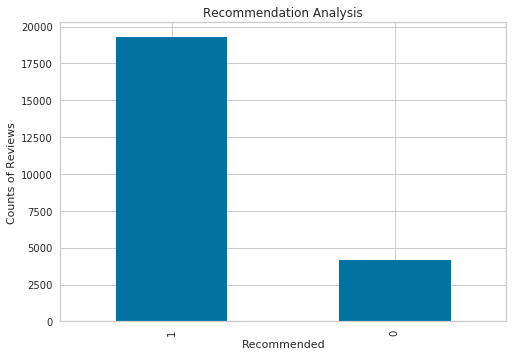

In [14]:
ProductReview_df["Recommended"].value_counts().plot(kind='bar')
plt.xlabel("Recommended")
plt.ylabel("Counts of Reviews")
plt.title("Recommendation Analysis")

Text(0.5, 1.0, 'Rating Analysis')

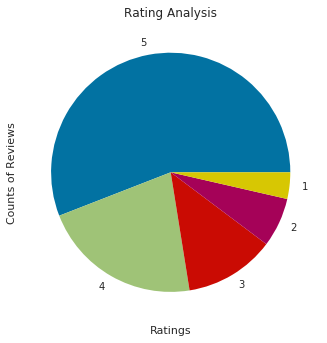

In [15]:
ProductReview_df["Rating"].value_counts().plot(kind='pie')
plt.xlabel("Ratings")
plt.ylabel("Counts of Reviews")
plt.title("Rating Analysis")

Text(0.5, 1.0, 'Class Name Analysis')

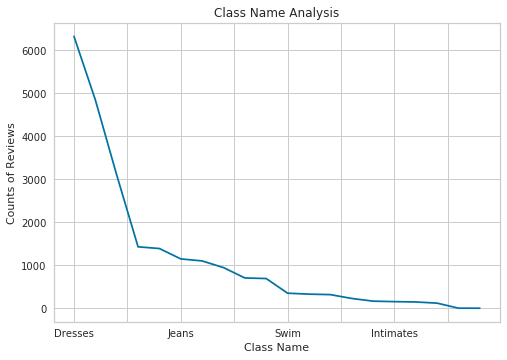

In [16]:
ProductReview_df["Class Name"].value_counts().plot(kind='line')
plt.xlabel("Class Name")
plt.ylabel("Counts of Reviews")
plt.title("Class Name Analysis")

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


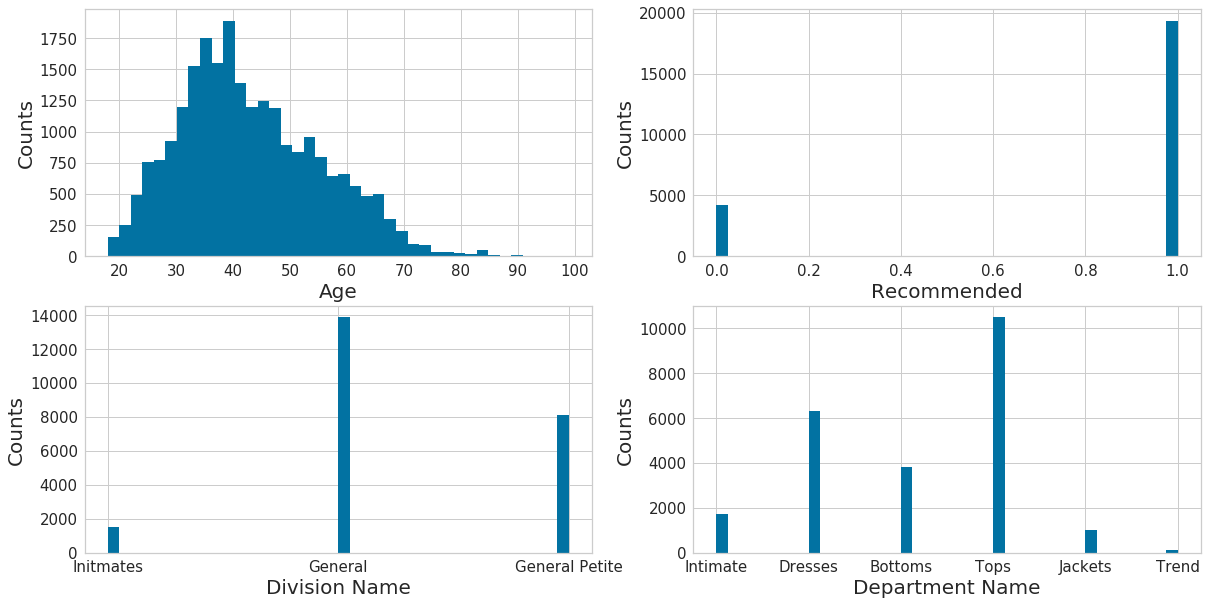

In [17]:
plt.rcParams['figure.figsize'] = (20, 10)

# make subplots
fig, axes = plt.subplots(nrows = 2, ncols = 2)

# Specify the features of interest
num_features = ['Age', 'Recommended', 'Division Name', 'Department Name']
xaxes = num_features
yaxes = ['Counts', 'Counts', 'Counts', 'Counts']

# draw histograms
axes = axes.ravel()
for idx, ax in enumerate(axes):
    ax.hist(ProductReview_df[num_features[idx]].dropna(), bins=40)
    ax.set_xlabel(xaxes[idx], fontsize=20)
    ax.set_ylabel(yaxes[idx], fontsize=20)
    ax.tick_params(axis='both', labelsize=15)
#plt.show()

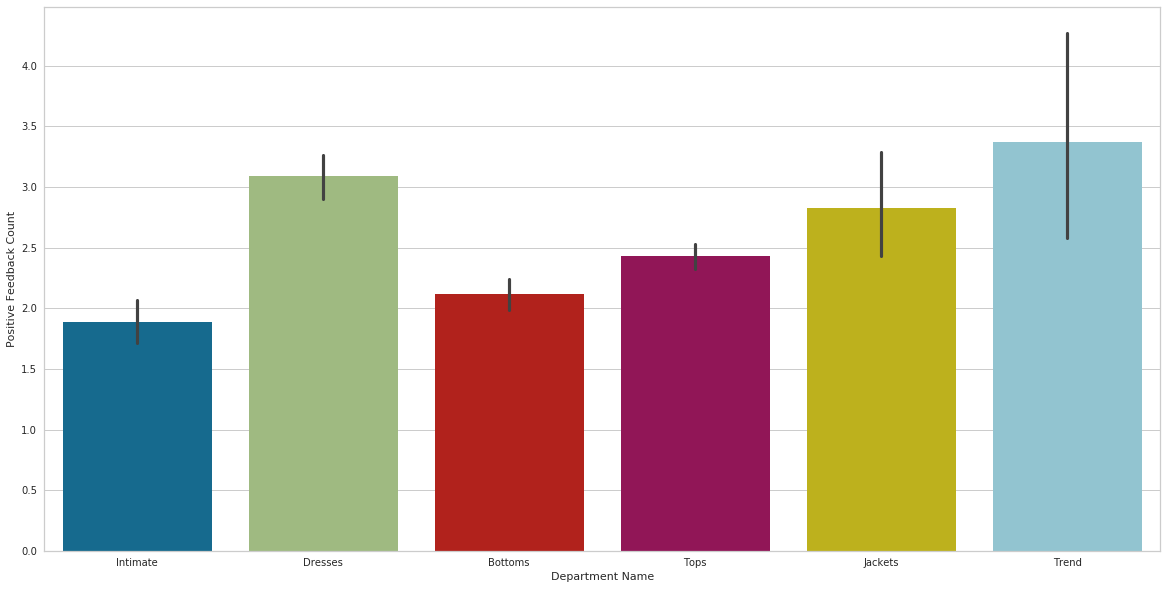

In [18]:
sns.barplot(x='Department Name', y='Positive Feedback Count', data=ProductReview_df)

### Remove Unwanted Columns

In [19]:
ProductReview_df.drop(columns=['Division Name'])

,Clothing ID,Age,Title,Review,Rating,Recommended,Positive Feedback Count,Department Name,Class Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,Tops,Blouses
...,...,...,...,...,...,...,...,...,...
23481,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,Dresses,Dresses
23482,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0,Tops,Knits
23483,1104,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,1,Dresses,Dresses
23484,1084,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,2,Dresses,Dresses


###  Handling Missing Values

In [20]:
# fill with the most represented value
def fill_na_most(data, inplace=True):
    return ProductReview_df.fillna('NoValue', inplace=inplace)

fill_na_most(ProductReview_df['Title'])
fill_na_most(ProductReview_df['Review'])

In [21]:
ProductReview_df.isna().sum()

Clothing ID                0
Age                        0
Title                      0
Review                     0
Rating                     0
Recommended                0
Positive Feedback Count    0
Division Name              0
Department Name            0
Class Name                 0
dtype: int64

In [22]:
ProductReview_df.isna().sum()

Clothing ID                0
Age                        0
Title                      0
Review                     0
Rating                     0
Recommended                0
Positive Feedback Count    0
Division Name              0
Department Name            0
Class Name                 0
dtype: int64

In [23]:
ProductReview_df.isnull().sum()

Clothing ID                0
Age                        0
Title                      0
Review                     0
Rating                     0
Recommended                0
Positive Feedback Count    0
Division Name              0
Department Name            0
Class Name                 0
dtype: int64

In [24]:
ProductReview_df.dropna(inplace = True)

In [25]:
len(ProductReview_df)

23486

### Text preprocessing
The below are steps we need to follow for the text preprocessing through Natural Language Tool Kit (NLTK)

Lowercase

Removing Punctuation

Tokenization

Stopword Filtering

Stemming

###  Token, Stopwords, numbers, lemma are the functions

In [47]:
def tokens(words):
    words = re.sub("[^a-zA-Z]"," ", words)
    text = words.lower().split()                   
    return " ".join(text)

In [49]:
def numbers(text):
    new_text = []
    for word in text.split():
        if not re.search('\d', word):
            new_text.append(word)
    return ' '.join(new_text)

In [50]:
lem = WordNetLemmatizer()

def lemma(text):
    lem_text = [lem.lemmatize(word) for word in text.split()]
    return " ".join(lem_text)

In [74]:
ProductReview_df['Review_clear'] = ProductReview_df['Review'].apply(tokens)
ProductReview_df['Review_clear'] = ProductReview_df['Review_clear'].astype(str)

#### Applying the Pre-processing for Text

####  Considering workds for Clothes

In [77]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [78]:
# Show some stop words
stop_words = stopwords.words('english')
print(stop_words[::10])

['i', "you've", 'himself', 'they', 'that', 'been', 'a', 'while', 'through', 'in', 'here', 'few', 'own', 'just', 're', 'doesn', 'ma', "shouldn't"]


In [79]:
clothes =['shirt','attire','garb','T-shirt','jeans','swimsuit','coat','gym clothes','dress','color','wear','top','sweater','material','shirt','jeans','pant',
          'skirt','order','white','black','fabric','blouse','sleeve','even', 'jacket']

In [80]:
def stopwords(review):
    text = [word.lower() for word in review.split() if word.lower() not in stop_words and word.lower() not in clothes]
    return " ".join(text)

In [81]:
ProductReview_df['Review_clear'] = ProductReview_df['Review_clear'].apply(stopwords)
ProductReview_df.head()

,Clothing ID,Age,Title,Review,Rating,Recommended,Positive Feedback Count,Division Name,Department Name,Class Name,Review_clear
0,767,33,NoValue,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,absolutely wonderful silky sexy comfortable
1,1080,34,NoValue,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,love sooo pretty happened find store glad bc n...
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,high hopes really wanted work initially ordere...
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,love love love jumpsuit fun flirty fabulous ev...
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,flattering due adjustable front tie perfect le...


In [83]:
lem = WordNetLemmatizer()

def lemma(text):
    lem_text = [lem.lemmatize(word) for word in text.split()]
    return " ".join(lem_text)

In [85]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /home/jovyan/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [86]:
ProductReview_df['Review_clear'] = ProductReview_df['Review_clear'].apply(lemma)
ProductReview_df.head()

,Clothing ID,Age,Title,Review,Rating,Recommended,Positive Feedback Count,Division Name,Department Name,Class Name,Review_clear
0,767,33,NoValue,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,absolutely wonderful silky sexy comfortable
1,1080,34,NoValue,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,love sooo pretty happened find store glad bc n...
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,high hope really wanted work initially ordered...
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,love love love jumpsuit fun flirty fabulous ev...
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,flattering due adjustable front tie perfect le...


#### Postive and Negative Comments

In [87]:
positive = ProductReview_df[ProductReview_df.Recommended== 1]
negative = ProductReview_df[ProductReview_df.Recommended== 0]
positive.head()

,Clothing ID,Age,Title,Review,Rating,Recommended,Positive Feedback Count,Division Name,Department Name,Class Name,Review_clear
0,767,33,NoValue,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,absolutely wonderful silky sexy comfortable
1,1080,34,NoValue,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,love sooo pretty happened find store glad bc n...
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,love love love jumpsuit fun flirty fabulous ev...
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,flattering due adjustable front tie perfect le...
6,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits,aded basket hte last mintue see would look lik...


In [88]:
negative.head()

,Clothing ID,Age,Title,Review,Rating,Recommended,Positive Feedback Count,Division Name,Department Name,Class Name,Review_clear
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,high hope really wanted work initially ordered...
5,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses,love tracy reese dress one petite foot tall us...
10,1077,53,Dress looks like it's made of cheap material,Dress runs small esp where the zipper area run...,3,0,14,General,Dresses,Dresses,run small esp zipper area run ordered sp typic...
22,1077,31,Not what it looks like,"First of all, this is not pullover styling. th...",2,0,7,General,Dresses,Dresses,first pullover styling side zipper purchased k...
25,697,31,Falls flat,"Loved the material, but i didnt really look at...",3,0,0,Initmates,Intimate,Lounge,loved didnt really look long purchased large m...


#### Getting Positive and Negative Words

In [89]:
positive_words =[]

for review in positive.Review_clear:
    positive_words.append(review) 
positive_words = ' '.join(positive_words)
positive_words[:100]

'absolutely wonderful silky sexy comfortable love sooo pretty happened find store glad bc never would'

In [90]:
negative_words = []

for review in negative.Review_clear:
    negative_words.append(review)
negative_words = ' '.join(negative_words)
negative_words[:80]

'high hope really wanted work initially ordered petite small usual size found out'

##  Models

In [94]:
X = ProductReview_df['Review_clear']
y = ProductReview_df['Recommended']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 0)

In [95]:
vect = CountVectorizer(min_df=5, ngram_range=(1,2)).fit(X_train)

X_train_vectorized = vect.transform(X_train)

len(vect.get_feature_names())

15121

In [97]:
print(y_train.value_counts())
print(y_test.value_counts())

1    13508
0     2932
Name: Recommended, dtype: int64
1    5806
0    1240
Name: Recommended, dtype: int64


###  Logistic Regression

#### Model Developement

In [98]:
model = LogisticRegression(penalty='l1', solver='liblinear')
model.fit(X_train_vectorized, y_train)
ytest = np.array(y_test)
predictions = model.predict(vect.transform(X_test))

/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/linear_model/base.py:291: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  indices = (scores > 0).astype(np.int)


In [117]:
print('The Accuracy of the Model is %s' % accuracy_score(predictions, y_test))
print(' The Classification Report of Accuracy Model as below')
print(classification_report(ytest, predictions))

The Accuracy of the Model is 0.889724666477434
 The Classification Report of Accuracy Model as below
              precision    recall  f1-score   support

           0       0.73      0.60      0.66      1240
           1       0.92      0.95      0.93      5806

    accuracy                           0.89      7046
   macro avg       0.82      0.77      0.80      7046
weighted avg       0.88      0.89      0.89      7046



In [127]:
# Building a logistic regression model
# Import the necessary modules
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

# Compute and print the confusion matrix 
print(' The confusion_matrix of Accuracy Model as below')
print(confusion_matrix(y_test, predictions))


 The confusion_matrix of Accuracy Model as below
[[ 740  500]
 [ 277 5529]]


#### Hyperparameter tuning

In [120]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDClassifier


grid = {
    'alpha': [1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3],
    'max_iter': [100,500,1000], 
    'loss': ['log'], # logistic regression,
    'penalty': ['l2'],
    }

sgd=SGDClassifier()
sgd_cv=GridSearchCV(sgd,grid,cv=10,n_jobs=5,verbose=10)
sgd_cv.fit(X_train_vectorized, y_train)
print("Tuned hyperparameters :(best parameters) ",sgd_cv.best_params_)
print("accuracy :",sgd_cv.best_score_)


Fitting 10 folds for each of 24 candidates, totalling 240 fits


/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/model_selection/_split.py:670: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  test_folds = np.zeros(n_samples, dtype=np.int)
/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/model_selection/_split.py:442: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. I

Tuned hyperparameters :(best parameters)  {'alpha': 0.001, 'loss': 'log', 'max_iter': 100, 'penalty': 'l2'}
accuracy : 0.8886861313868614


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=100,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

###  Random Forest

Model Developement

In [ ]:
model_rf = Pipeline([('vect', CountVectorizer(min_df=5, ngram_range=(1,2))),
                    ('tfidf', TfidfTransformer()),
                    ('clf-rf', RandomForestClassifier(n_estimators=50)),
                    ])

model_rf.fit(X_train, y_train)

ytest = np.array(y_test)
pred = model_rf.predict(X_test)

####  Hyperparameter tuning

In [ ]:
from sklearn.model_selection import GridSearchCV
# Define the hyperparameter configuration space
rf_params = {
    'n_estimators': [10, 20, 30],
    #'max_features': ['sqrt',0.5],
    'max_depth': [15,20,30,50],
    #'min_samples_leaf': [1,2,4,8],
    #"bootstrap":[True,False],
    "criterion":['gini','entropy']
}
clf = RandomForestClassifier(random_state=0)
grid = GridSearchCV(clf, rf_params, cv=3, scoring='accuracy')
grid.fit(X_train, y_train)

In [157]:
print('The Accuracy of Random Forest is %s' % accuracy_score(pred, y_test))
print(classification_report(ytest, pred))

The Accuracy of Random Forest is 0.867726369571388
              precision    recall  f1-score   support

           0       0.82      0.32      0.46      1240
           1       0.87      0.98      0.92      5806

    accuracy                           0.87      7046
   macro avg       0.84      0.65      0.69      7046
weighted avg       0.86      0.87      0.84      7046



## SVM - Support Vector Machine

In [ ]:
model_svm = Pipeline([('vect', CountVectorizer(min_df=5, ngram_range=(1, 2))),
                    ('tfidf', TfidfTransformer()),
                    ('clf-svm',SGDClassifier(loss='hinge',penalty='l2', alpha=1e-3, random_state=42)),
                    ])

model_svm.fit(X_train, y_train)

ytest = np.array(y_test)
y_predict = model_svm.predict(X_test)

#### Hyperparameter Optimization - SVM

In [ ]:
from sklearn.model_selection import GridSearchCV
rf_params = {
    'C': [1,10, 100],
    "kernel":['linear','poly','rbf','sigmoid']
}
clf = SVC(gamma='scale')
grid = GridSearchCV(clf, rf_params, cv=3, scoring='accuracy')
grid.fit(X_train, y_train)

In [168]:
print('The accuracy of the SVM is %s' % accuracy_score(y_predict, y_test))
print(classification_report(ytest, y_predict))

The accuracy of the SVM is 0.8262844166903207
              precision    recall  f1-score   support

           0       1.00      0.01      0.03      1240
           1       0.83      1.00      0.90      5806

    accuracy                           0.83      7046
   macro avg       0.91      0.51      0.47      7046
weighted avg       0.86      0.83      0.75      7046



In [169]:
model_nb = Pipeline([('vect', CountVectorizer(min_df=5, ngram_range=(1,2))),
                   ('tfidf', TfidfTransformer()),
                   ('clf',MultinomialNB()),
                   ])

model_nb.fit(X_train, y_train)

ytest = np.array(y_test)
pred_y = model_nb.predict(X_test)

In [170]:
print('accuracy of Naive Bayes %s' % accuracy_score(pred_y, y_test))
print(classification_report(ytest, pred_y))

accuracy of Naive Bayes 0.8489923360772069
              precision    recall  f1-score   support

           0       0.94      0.15      0.26      1240
           1       0.85      1.00      0.92      5806

    accuracy                           0.85      7046
   macro avg       0.89      0.57      0.59      7046
weighted avg       0.86      0.85      0.80      7046



## Milestone 4 - Conclusion

1. The product received more recommendation from Customers
2. Most of the Customer provided Rating 5 for Products
3. In the Dress Class Name received more Recommentation and Reviews
4. Customers from Age 30 to 40 are participated much in Reviews
5. Tops from Depart Name received more Reviews
6. Removed the unwanted Columns
7. Handled the NA values and NULL Values

8. Preprocessed the Text data and Identified the Postive and Negative comments

     Lowercase

     Removing Punctuation

     Tokenization

     Stopword Filtering

     Stemming
     
     

10. Ran Logistic, Random Forest, SVM and Naive Bayes and identified the Accuracy
          Logistic - 88.88%          
          Random Forest - 86.97%
          SVM - 82.62%
          Naive Bayes - 84.89%
          
 11. Perfomred the Hyperparameter Tuning for the Models and verified the best parameter and accuracy.
 
 

##  Next Steps

Performace Evaluation Metrics

Accuracy: test’s ability to correctly predict both classes
Precision: test’s ability to correctly detect positive classes from all predicted positive classes
Recall (Sensitivity): test’s ability to correctly detect positive classes from all actual positive classes
F1 Score: harmonic mean of precision and recall


4. Deployment


5. Conculsion and Summary of the Project
    

## References

1.  Sentiment analysis using product review data, Journel of Big Data
        https://journalofbigdata.springeropen.com/articles/10.1186/s40537-015-0015-2
        
2.  Sentiment Analysis, Wikipedia
        https://en.wikipedia.org/wiki/Sentiment_analysis.

3.  Sentiment Analysis: A Definitive Guide, MonkeyLearn

        https://monkeylearn.com/sentiment-analysis/
        
4.  https://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.DataFrame.plot.html

5. https://www.zentut.com/data-mining/data-mining-processes/
